In [17]:
import pandas as pd
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [2]:
# #carregando a base de dados
df_total = pd.read_csv('https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv')

# filtrando colunas
df_total = df_total[['epi_week', 'date', 'country', 'state', 'city', 'newDeaths', 'deaths', 'newCases', 'totalCases', 
         'deathsMS', 'totalCasesMS', 'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants',
         'deaths_by_totalCases', 'recovered', 'suspects', 'tests','tests_per_100k_inhabitants']]

#traduzindo colunas
df_total.rename(columns={'epi_week': 'semana', 'date': 'data', 'country': 'pais', 'state': 'estado', 
                   'city': 'cidade', 'newDeaths': 'novosObitos', 'deaths': 'Obitos', 'newCases': 'novosCasos', 
                   'totalCases': 'Casos', 'deathsMS': 'obitosMS', 'totalCasesMS': 'casosMS',
                   'deaths_per_100k_inhabitants': 'obitos_por_100k', 'totalCases_per_100k_inhabitants': 'casos_por_100k',
                   'deaths_by_totalCases': 'obitos_por_casos', 'recovered': 'recuperados', 'suspects': 'suspeitos', 
                   'tests': 'testes', 'tests_per_100k_inhabitants': 'testes_por_100k'}, 
          inplace=True)


# visualizando df
df_total.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00047,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00047,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN


In [3]:
# filtrando apenas os dados do estado de SP
df_total = df_total[df_total['estado'] == 'SP']
# transformando coluna data em datetime
df_total['data'] = pd.to_datetime(df_total['data'], format='%Y-%m-%d')
# transformando o index em data
df_total.index = pd.to_datetime(df_total['data'])

df_total.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
data,,,,,,,,,,,,,,,,,,
2020-02-25,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-26,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-27,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2020-02-28,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
2020-02-29,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


In [4]:
df_total2 = df_total
df_total = df_total[:300] #filtrando apenas 300 dias
df_total.tail().index[0]

Timestamp('2020-12-16 00:00:00')

In [5]:
# definindo uma nova variável para armazenar os novos obitos
y= df_total['novosObitos']
y

data
2020-02-25      0
2020-02-26      0
2020-02-27      0
2020-02-28      0
2020-02-29      0
             ... 
2020-12-16      0
2020-12-17    399
2020-12-18    197
2020-12-19    151
2020-12-20      0
Name: novosObitos, Length: 300, dtype: int64

In [6]:
import itertools

p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [7]:
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p,d,q))]
seasonal_pdq

[(0, 0, 0, 7),
 (0, 0, 1, 7),
 (0, 1, 0, 7),
 (0, 1, 1, 7),
 (1, 0, 0, 7),
 (1, 0, 1, 7),
 (1, 1, 0, 7),
 (1, 1, 1, 7)]

In [8]:
print(f"SARIMAX: {pdq[1]}x{seasonal_pdq[2]}")

SARIMAX: (0, 0, 1)x(0, 1, 0, 7)


In [18]:
import statsmodels.api as sm
aic_list= []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(y, 
                                        order=param,
                                        seasonal_order=param_seasonal)
        results= mod.fit()
        aic_list.append(f'ARIMA{param}x{param_seasonal}  - AIC{results.aic}')

In [19]:
aic_list

['ARIMA(0, 0, 0)x(0, 0, 0, 7)  - AIC4017.1944378824282',
 'ARIMA(0, 0, 0)x(0, 0, 1, 7)  - AIC3759.9849845634917',
 'ARIMA(0, 0, 0)x(0, 1, 0, 7)  - AIC3285.0200137893744',
 'ARIMA(0, 0, 0)x(0, 1, 1, 7)  - AIC3234.8580077624792',
 'ARIMA(0, 0, 0)x(1, 0, 0, 7)  - AIC3368.8097880892096',
 'ARIMA(0, 0, 0)x(1, 0, 1, 7)  - AIC3323.0509195118884',
 'ARIMA(0, 0, 0)x(1, 1, 0, 7)  - AIC3238.598590303596',
 'ARIMA(0, 0, 0)x(1, 1, 1, 7)  - AIC3234.3142899965533',
 'ARIMA(0, 0, 1)x(0, 0, 0, 7)  - AIC3840.1363160919364',
 'ARIMA(0, 0, 1)x(0, 0, 1, 7)  - AIC3666.397053350248',
 'ARIMA(0, 0, 1)x(0, 1, 0, 7)  - AIC3286.3636014079893',
 'ARIMA(0, 0, 1)x(0, 1, 1, 7)  - AIC3236.5104088677313',
 'ARIMA(0, 0, 1)x(1, 0, 0, 7)  - AIC3370.769998174561',
 'ARIMA(0, 0, 1)x(1, 0, 1, 7)  - AIC3324.227466131797',
 'ARIMA(0, 0, 1)x(1, 1, 0, 7)  - AIC3240.500239529436',
 'ARIMA(0, 0, 1)x(1, 1, 1, 7)  - AIC3236.154529403906',
 'ARIMA(0, 1, 0)x(0, 0, 0, 7)  - AIC3712.2554406569598',
 'ARIMA(0, 1, 0)x(0, 0, 1, 7)  - AIC3

* Menor ARIMAX:        
'ARIMA(1, 1, 1)x(0, 1, 1, 7)  - AIC3189.659828789204'

In [20]:
mod = sm.tsa.statespace.SARIMAX(y, 
                               oder=(1,1,1), 
                               seasonal_order=(0,1,1,7))

results= mod.fit()

* Verificando se esse modelo é realmento o melhor a ser usado.

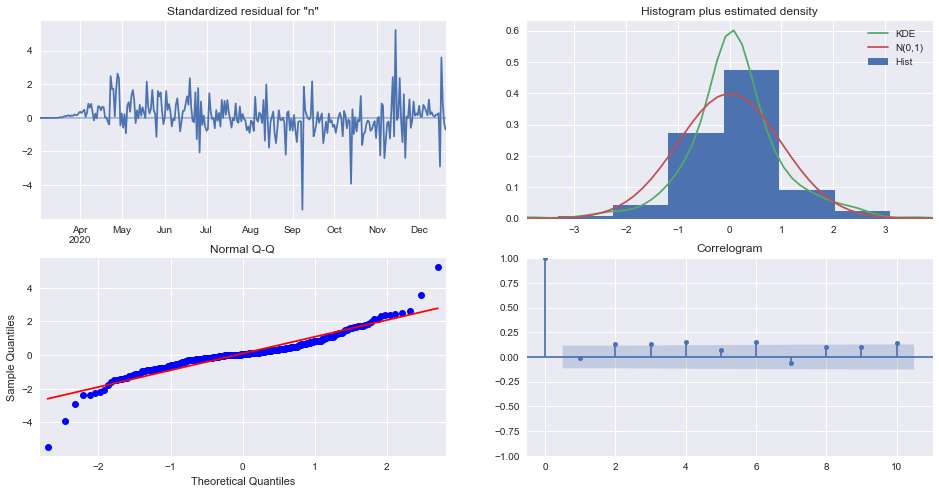

In [21]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

* 1º Gráfico: Standardized residual for "C":
     * Nos trás a quantidade de resíduos em função da série temporal, e podemos ver que em alguma datas a              quantidade de resíduos são maiores e em outras menores. Isso está relacionado a o aumento de casos,              se temos mais casos, mais complexa fica a previsão, por isso é normal esse aumento de resíduo.
     
* 2º Gráfico: Histogram plus estimated density:
    * Nesse gráfico vamos ter a distribuição normal (linha verde), e teremos o KDE (linha laranja) que são a           distribuição dos meus resíduos, que nesse caso queremos que eles se apróxime da nossa distribuição normal,       que significa que os resíduos estão normalmente distribuidos. (não é o caso dessa série temporal, por que       ela é muito crescente, tem uma tendencia de crescimento muito alta).
* 3º Gráfico: Correlogram:
    * Onde vamos ter as autocorrelações, que seriam as autocorrelações resíduais, que nesse caso estão extremamente baixas (abaixo do 0.25), significa que, nosso modelo conseguiu de fato trasnformar a nossa série em algo estacionário antes de fazer as previsões.
    * (Estacionária): 
        * Quando a média e a variância são constantes ao longo do tempo. Ou seja, quando não há tendência ou sazonalidade aparentes!
* 4º Gráfico: Normal Q-Q:
    * Q - Quantil, é uma medida estatistica que esta fazendo a comparação entre os quantis (quanto mais próximo o modelo dos nossos dados, mais o pontinho azuis vão estar na linha vermelha).
  
 <br>
 
<font size=5>  Esses resultados estão dentro do esperado.

* Iniciando Previsões

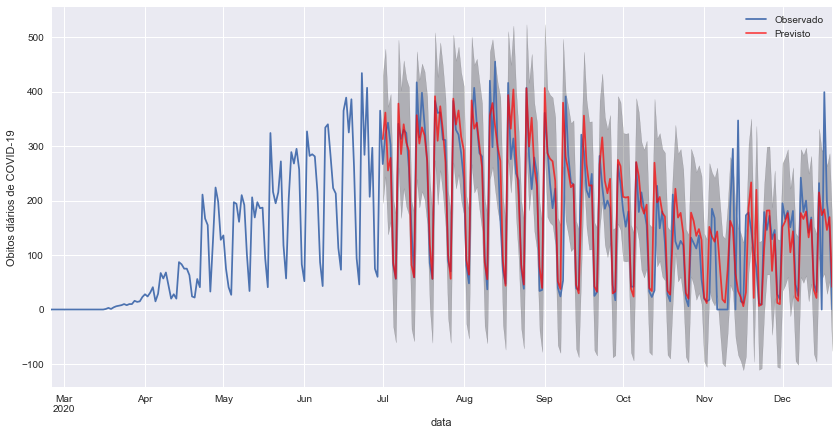

In [22]:
pred = results.get_prediction(start=pd.to_datetime('2020-07-01'), dynamic=False)
pred_ic = pred.conf_int() # intervalo de confiança
ax= y['2020':].plot(label='Observado')
pred.predicted_mean.plot(ax=ax, label='Previsto', color='r', alpha=0.7, figsize=(14,7))
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k', alpha=0.25)
ax.set_ylabel('Obitos diários de COVID-19')
plt.legend()
plt.show()

* Se observarmos o intervalo de confiança (cinza), poder ver que que está quase tudo dentro do esperado, tirando as datas entre nov e dez. Onde houve um aumento que não era esperado.

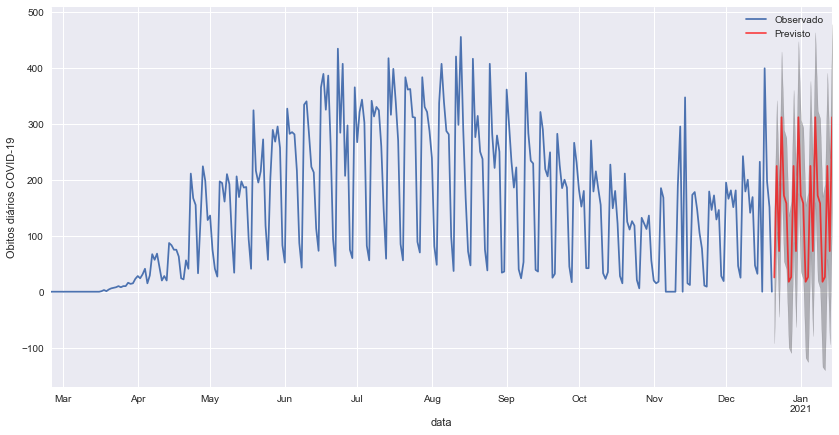

In [23]:
# prevendo para 25 dias
pred_uc = results.get_forecast(steps=25)
pred_ic = pred_uc.conf_int()
ax = y.plot(label='Observado', figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax, label='Previsto', color='r', alpha=0.7)
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k', alpha=0.25)
ax.set_xlabel('data')
ax.set_ylabel('Obitos diários COVID-19')
plt.legend()
plt.show()

* Comparando previsão com o que aconteceu de fato

In [24]:
df_total2.tail()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
data,,,,,,,,,,,,,,,,,,
2021-09-30,139,2021-09-30,Brazil,SP,TOTAL,189,149810,1550,4366132,149810,4366132,326.24805,9508.32409,0.03431,4150008.0,1137203.0,14183490.0,30888.0308
2021-10-01,139,2021-10-01,Brazil,SP,TOTAL,143,149953,1616,4367748,149953,4367748,326.55946,9511.84333,0.03433,4150008.0,1137203.0,14183490.0,30888.0308
2021-10-02,139,2021-10-02,Brazil,SP,TOTAL,97,150050,1313,4369061,150050,4369061,326.77070,9514.70271,0.03434,4150691.0,1137203.0,14183490.0,30888.0308
2021-10-03,140,2021-10-03,Brazil,SP,TOTAL,14,150064,477,4369538,150064,4369538,326.80119,9515.74150,0.03434,4150691.0,1137203.0,14183490.0,30888.0308
2021-10-04,140,2021-10-04,Brazil,SP,TOTAL,22,150086,205,4369743,150086,4369743,326.84910,9516.18793,0.03435,4152447.0,1137203.0,14183490.0,30888.0308


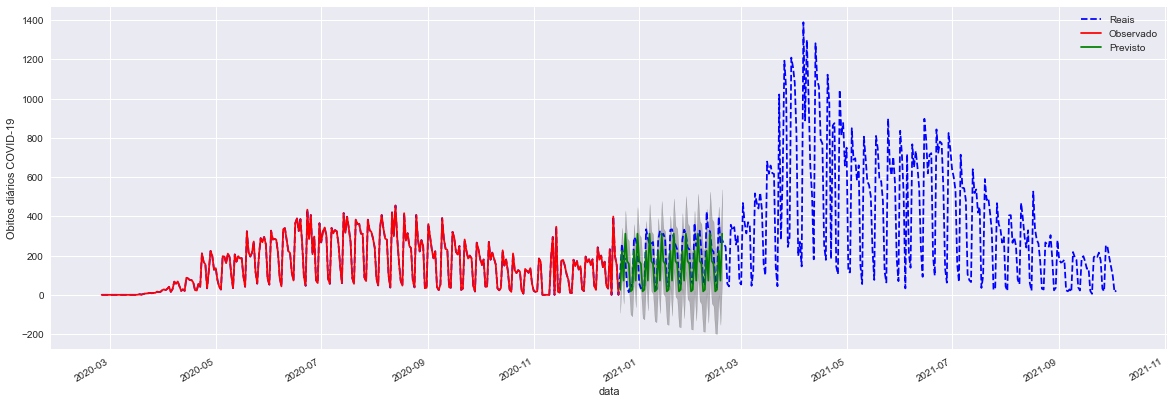

In [25]:
# prevendo para 60 dias
pred_uc = results.get_forecast(steps=60)
pred_ic = pred_uc.conf_int()
x = df_total2['novosObitos']
plt.figure(figsize=(20,7))
fig = plt.plot(x, linestyle='--', color='b', label='Reais')
ax = y.plot(label='Observado', color='red')
pred_uc.predicted_mean.plot(ax=ax, label='Previsto', color='green')
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k', alpha=0.25)
ax.set_xlabel('data')
ax.set_ylabel('Obitos diários COVID-19')
plt.legend()
plt.show()